In [ ]:
# Write to file
with open("my_grades.txt", "w") as f:
    f.write("Ved Amin\n")
    f.write("Math: 85\n")
    f.write("Science: 90\n")
    f.write("English: 78\n")
    f.write("History: 88\n")
    f.write("Art: 95\n")

# Read and print
with open("my_grades.txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        print(line.strip())

# Calculate average
grades = [85, 90, 78, 88, 95]
average = sum(grades) / len(grades)
print(f"Average Grade: {average}")

In [ ]:
class Student:
    def __init__(self, name, age, grade):
        self.name = name
        self.age = age
        self.grades = [grade] # Initialize grades as a list with the initial grade

    def add_grade(self,grade):
        self.grades.append(grade)

    def get_average_grade(self):
        return sum(self.grades) / len(self.grades)

    def get_letter_grade(self):
        avg = self.get_average_grade()
        if avg >= 90:
            return "A"
        elif avg >= 80:
            return "B"
        elif avg >= 70:
            return "C"
        elif avg >= 60:
            return "D"
        else:
            return "F"

# Test
student = Student("Alice", 16, 85) # Pass a single grade initially
student.add_grade(90)
student.add_grade(78)
student.add_grade(88)
print(f"Average: {student.get_average_grade()}") # Correct method call
print(f"Letter Grade: {student.get_letter_grade()}")

In [ ]:
import pandas as pd
data = {
    "Name": ["Alice", "Bob", "Charlie", "Diana", "Eve", "Frank", "Grace", "Henry", "Ivy", "Jack"],
    "Age": [16, 17, 16, 18, 17, 16, 18, 17, 16, 17],
    "Math": [85, 78, 92, 88, 90, 82, 95, 87, 89, 84],
    "Science": [90, 82, 88, 95, 85, 78, 92, 89, 91, 86],
    "English": [88, 85, 90, 87, 92, 83, 94, 86, 88, 89]
}
df = pd.DataFrame(data)
print(df.head(3))
print(df.info())
print(df[["Math", "Science", "English"]].mean())
df["Total"]= df[["Math", "Science","English"]].sum(axis=1)
top_student =  df.loc[df["Total"].idxmax()]
print(f"Top Student: {top_student['Name']} with score {top_student['Total']}")

In [ ]:
import matplotlib.pyplot as plt
# Averages
averages = df[["Math", "Science", "English"]].mean()
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Bar Chart
axs[0].bar(averages.index, averages.values, color='skyblue')
axs[0].set_title("Average Scores by Subject")
axs[0].set_ylabel("Average Score")
#Histogram
axs[1].hist(df["Math"], bins=5, color='lightgreen')
axs[1].set_title("Histogram of Math Scores")
# Scatter plot
axs[2].scatter(df["Math"], df["Science"], color='salmon')
axs[2].set_title("Math vs Science Scores")
axs[2].set_xlabel("Math")
axs[2].set_ylabel("Science")
plt.tight_layout()
plt.show()


In [ ]:
# Above 85 in Math
print("Math > 85")
print(df[df["Math"] > 85])
# Above 80 in all Subjects
print("All subjects > 80")
print(df[(df["Math"] > 80) & (df["Science"] > 80) & (df["English"] > 80)])
# Total scoring
df["Total_Score"] = df [["Math", "Science", "English"]].sum(axis=1)
# Sort
print("Sorted by Total Score")
print(df.sort_values(by="Total_Score", ascending=False))

In [ ]:
def analyze_subject(df, subject_name):
    subject = df[subject_name]
    print(f"{subject_name} - Max: {subject.max()}, Min: {subject.min()}, Avg: {subject.mean()}")
    print(f"Students scoring above 80: {(subject > 80).sum()}")

def compare_ages(df):
    df["Total"] = df[["Math", "Science", "English"]].sum(axis=1)
    print(df.groupby("Age")["Total"].mean())

analyze_subject(df, "Math")
compare_ages(df)

In [ ]:
def get_letter(avg):
    if avg >= 90: return "A"
    elif avg >= 80: return "B"
    elif avg >= 70: return "C"
    elif avg >= 60: return "D"
    return "F"

df["Average_Score"] = df[["Math", "Science", "English"]].mean(axis=1)
df["Letter_Grade"] = df["Average_Score"].apply(get_letter)

# Save to CSV
df[["Name", "Age", "Average_Score", "Letter_Grade"]].to_csv("student_report.csv", index=False)

# Class summary
summary = [
    f"Total Students: {len(df)}",
    f"Class Average: {df['Average_Score'].mean():.2f}",
    df["Letter_Grade"].value_counts().to_string()
]

with open("class_summary.txt", "w") as f:
    f.write("\n".join(summary))

In [ ]:
import matplotlib.pyplot as plt
# Group by Age
avg_math_by_age = df.groupby("Age")["Math"].mean()
count_by_age = df["Age"].value_counts()
print("Average Math by Age:\n", avg_math_by_age)
print("Count by Age:\n", count_by_age)
# Plot
avg_math_by_age.plot(kind='bar', title="Average Math Score by Age", color='orange')
plt.ylabel("Average Score")
plt.show()

print("Best performing age group in Math:", avg_math_by_age.idxmax())

In [ ]:
messy_data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Diana'],
    'Math': [85, 90, '', 88, 92],
    'Age': [16, 17, 16, 16, 18]
}
messy_df = pd.DataFrame(messy_data)

print("Original shape:", messy_df.shape)
print("Original Data:\n", messy_df)

# Remove duplicates
messy_df = messy_df.drop_duplicates()

# Replace empty strings with NaN
messy_df["Math"].replace("", pd.NA, inplace=True)
messy_df["Math"] = pd.to_numeric(messy_df["Math"])

# Fill missing values with mean
mean_math = messy_df["Math"].mean()
messy_df["Math"].fillna(mean_math, inplace=True)

print("Cleaned Data:\n", messy_df)

Alice's Average: 87.66666666666667
Bob's Average: 81.66666666666667
Charlie's Average: 90.0
Class Average: 86.44444444444446


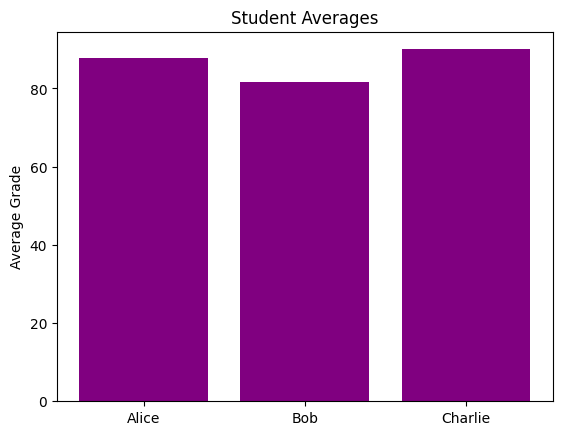

In [ ]:
class GradeBook:
    def __init__(self):
        self.students = {}

    def add_student(self, name, age):
        self.students[name] = {"Age": age, "Grades": {}}

    def add_grade(self, student_name, subject, grade):
        self.students[student_name]["Grades"][subject] = grade

    def get_student_average(self, student_name):
        grades = self.students[student_name]["Grades"].values()
        return sum(grades) / len(grades)

    def get_class_average(self):
        total = [self.get_student_average(name) for name in self.students]
        return sum(total) / len(total)

    def save_to_file(self, filename):
        rows = []
        for name, data in self.students.items():
            avg = self.get_student_average(name)
            row = {
                "Name": name,
                "Age": data["Age"],
                "Average": avg
            }
            rows.append(row)
        pd.DataFrame(rows).to_csv(filename, index=False)

# Test
gb = GradeBook()
gb.add_student("Alice", 16)
gb.add_student("Bob", 17)
gb.add_student("Charlie", 16)

gb.add_grade("Alice", "Math", 85)
gb.add_grade("Alice", "Science", 90)
gb.add_grade("Alice", "English", 88)

gb.add_grade("Bob", "Math", 78)
gb.add_grade("Bob", "Science", 82)
gb.add_grade("Bob", "English", 85)

gb.add_grade("Charlie", "Math", 92)
gb.add_grade("Charlie", "Science", 88)
gb.add_grade("Charlie", "English", 90)

for student in gb.students:
    print(f"{student}'s Average: {gb.get_student_average(student)}")

print("Class Average:", gb.get_class_average())

gb.save_to_file("gradebook.csv")

# Bar Chart
names = list(gb.students.keys())
averages = [gb.get_student_average(name) for name in names]

plt.bar(names, averages, color="purple")
plt.title("Student Averages")
plt.ylabel("Average Grade")
plt.show()